In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data after Labeling

samples: 3544


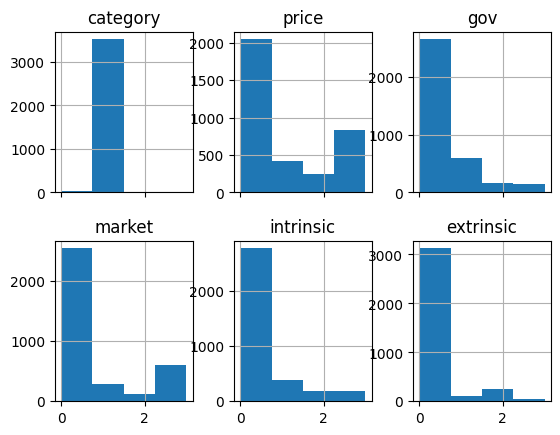

In [70]:
df = pd.read_csv("./original_data/original_data.csv")
df = df[['category', 'price', 'gov', 'market', 'intrinsic', 'extrinsic']]
# non_numeric_mask = df['intrinsic'].str.isnumeric()
# non_numeric_rows = df[~non_numeric_mask]
# print(non_numeric_rows)
print(f"samples: {len(df)}")
hist = df.hist(bins=4, sharex=True, layout=(2,3))

In [ ]:
# df = pd.read_csv('./raw_data/rice.csv')
# df.head()

In [ ]:
# df = pd.read_csv('./raw_data/rice.csv')
# timestamps = pd.to_datetime(df['date'],format='%d | %m | %Y')
# new_timestamps = []
# for date in timestamps:
#     new_timestamps.append(100000*date.year + date.month*1000 + date.day*10)
# df['date'] = new_timestamps
# pd.to_datetime(df['date'][0],format='%Y%m%d')

# BERT Embedding

In [1]:
from transformers import AutoTokenizer, DataCollatorWithPadding, BertModel, BertTokenizer
from vncorenlp import VnCoreNLP

In [2]:
rdrsegmenter = VnCoreNLP("../preprocessing/vncorenlp/VnCoreNLP-1.1.1.jar",
                         annotators="wseg", max_heap_size='-Xmx500m')
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
text = "vua có giới tính đàn ông, còn hoàng hậu là phụ nữ"

In [3]:
output = rdrsegmenter.tokenize(text)
output[0]

['vua', 'có', 'giới_tính', 'đàn_ông', ',', 'còn', 'hoàng_hậu', 'là', 'phụ_nữ']

In [4]:
tokenizer(output[0], truncation=True)

{'input_ids': [[0, 1692, 2], [0, 10, 2], [0, 4462, 2], [0, 651, 2], [0, 4, 2], [0, 50, 2], [0, 11185, 2], [0, 8, 2], [0, 419, 2]], 'token_type_ids': [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 'attention_mask': [[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1]]}

- vua: 1692
- đàn ông: 651
- hoàng hậu: 11185
- phụ nữ: 419

In [5]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
# data_collator.tokenizer
data_collator.tokenizer.get_vocab()['phụ_nữ']

419

In [6]:
# bert_model = BertModel.from_pretrained('vinai/phobert-base')
# configuration = bert_model.config
# configuration

In [7]:
model = BertModel.from_pretrained("vinai/phobert-base")

You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertModel were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['encoder.layer.3.attention.self.query.bias', 'encoder.layer.7.attention.self.value.bias', 'encoder.layer.7.attention.self.query.bias', 'encoder.layer.7.attention.self.value.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.6.output.dense.bias', 'pooler.dense.weight', 'encoder.layer.7.output.LayerNorm.bias', 'encoder.layer.6.attention.output.dense.weight', 'encoder.layer.1.output.dense.weight', 'encoder.layer.8.attention.self.value.weight', 'encoder.layer.4.intermediate.dense.weight', 'encoder.layer.4.attention.output.LayerNorm.weight', 'encoder.layer.5.output.LayerNorm.bias', 'encoder.layer.4.attention.self.value.bias', 'encoder.layer.9.output.dense.bias', 'encoder.layer.7.output.dense.bias', 'enc

In [8]:
model.embeddings

BertEmbeddings(
  (word_embeddings): Embedding(64001, 768, padding_idx=1)
  (position_embeddings): Embedding(258, 768)
  (token_type_embeddings): Embedding(1, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [9]:
import numpy as np
from numpy.linalg import norm
man = model.embeddings.word_embeddings.weight[651].detach().numpy()
king = model.embeddings.word_embeddings.weight[1692].detach().numpy()
queen = model.embeddings.word_embeddings.weight[11185].detach().numpy()
woman = model.embeddings.word_embeddings.weight[419].detach().numpy()

In [10]:
# cos_sim = np.dot(king, queen)/(norm(king)*norm(queen))
# cos_sim

In [11]:
woman

array([-2.99075004e-02,  2.78803316e-04, -1.13089057e-02,  1.74310748e-02,
       -1.43852076e-02,  2.28759069e-02, -2.44010123e-03, -2.54052822e-02,
        1.69816297e-02,  5.46975760e-03,  3.37390900e-02,  3.20774410e-03,
       -1.18448967e-02, -4.17382047e-02,  1.27634354e-04, -1.74940918e-02,
        4.79627820e-03, -1.57194640e-02, -3.72211561e-02,  1.41682513e-02,
       -1.71492770e-02,  1.68127511e-02, -7.00355740e-03,  8.96670949e-03,
        1.40545210e-02, -2.95015681e-03, -2.64082216e-02,  7.15070963e-03,
        4.49410686e-03, -6.40965439e-03, -2.78113279e-02, -2.11023018e-02,
       -1.26249976e-02,  6.15689252e-03,  1.19864307e-02,  2.03175321e-02,
       -2.45040059e-02, -2.16440931e-02, -2.18834877e-02,  1.84671152e-02,
       -1.16356909e-02, -1.14706717e-02, -4.97890264e-03, -1.51771568e-02,
       -1.38504524e-02, -3.55426222e-03, -4.91297394e-02,  7.18437647e-03,
       -1.36446173e-03, -3.76212969e-02, -1.51692296e-03, -2.61069965e-02,
       -3.70609909e-02, -